## Clustering of Astro Physics Collaboration network using Graph Min-Cut/Max Flow Algo

## Group No : 16

## Group Member Names:--> [Contribution in %]
1. Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in)--> [100%]

<h3> Problem Statement :</h3>

__Develop your own code to cluster the graph Min-Cut/Max flow algorithm. Do not used any open source library of Min-Cut/Max flow algorithm<br>
Data: ca-AstroPh: Collaboration network of Arxiv Astro Physics given on<br>__
https://snap.stanford.edu/data/ <br>

### Dataset information:

__ca-AstroPh:__ Collaboration network of Arxiv Astro Physics given on https://snap.stanford.edu/data/ca-AstroPh.html 

Arxiv ASTRO-PH (Astro Physics) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to Astro Physics category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its ASTRO-PH section.

### Import of Required Libraries

In [33]:
import random
import requests
import numpy as np
import random
from collections import deque

#for Graph Modelling & Plotting
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

### Download of Graph DataSet from url

In [18]:
def dwnld_graph(url_grp):
    # Download the dataset
    response = requests.get(url, stream=True)

    if response.status_code == 200:
        with open("ca-AstroPh.txt.gz", "wb") as file:
            for chunk in response.iter_content(chunk_size=128):
                file.write(chunk)

        print("Dataset downloaded successfully.")
    else:
        print("Failed to download the dataset.")

In [19]:
# Define the URL to download the ca-AstroPh dataset
url = "https://snap.stanford.edu/data/ca-AstroPh.txt.gz"

dwnld_graph(url)

Dataset downloaded successfully.


### Summary of Graph DataSet

In [20]:
def summary_graph(grp):
        # Load the dataset into a NetworkX graph

    # Display basic information about the graph
    print("Number of nodes:", grp.number_of_nodes())
    print("Number of edges:", grp.number_of_edges())
    
    # Calculate and display additional information
#     print("Degree of Graph:", grp.degree())
    avg_degree = sum(dict(grp.degree()).values()) / grp.number_of_nodes()
    density = nx.density(grp)
    print("Average Degree:", avg_degree)
    print("Graph Density:", density)    
    
    is_directed = grp.is_directed()
    print("Is the graph directed?", is_directed)

In [21]:
#     Read a graph from a list of edges.
graph = nx.read_edgelist(path="ca-AstroPh.txt.gz", create_using=nx.Graph(), nodetype=int)
summary_graph(graph)

Number of nodes: 18772
Number of edges: 198110
Average Degree: 21.10696782441935
Graph Density: 0.0011244455715955115
Is the graph directed? False


###  Plot of Full-Graph for Arxiv Astro Physics Collaboration Network

In [22]:
def plot_subgrph(grph):
    pos = nx.spring_layout(G=grph, seed=42)  # Define the layout for better visualization
    nx.draw(grph, pos, node_size=10, node_color="b", alpha=0.6, with_labels=False)
    plt.title("ca-AstroPh Dataset Full-Graph")
    plt.show()

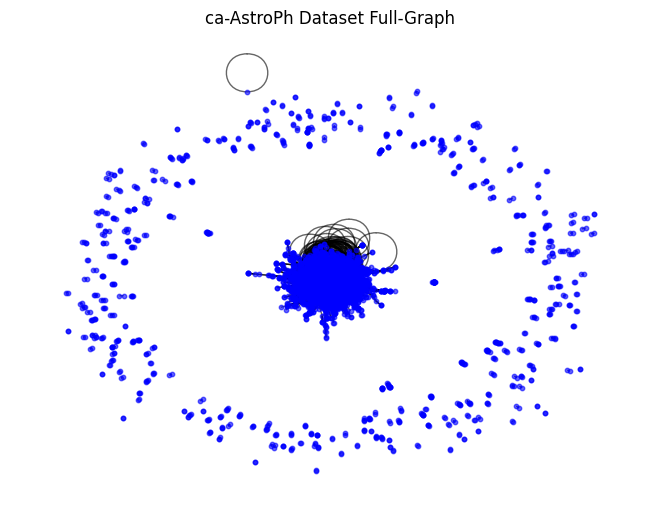

In [23]:
# # Plot Full-Graph for Arxiv Astro Physics Collaboration Network

plot_subgrph(graph)

### Implementation of Min-Cut/Max Flow Algorithm

* __Min-Cut/Max-Flow algorithm__ is a graph-based optimization technique used to find the maximum flow between two nodes in a network. 
* It models flow networks as directed graphs with capacities on edges and aims to maximize the flow from a __source node__ to a __sink node__ while respecting capacity constraints. 
* The algorithm iteratively augments flow along paths in a __residual graph__, updating capacities and flow values until no more augmenting paths can be found. 
* The value of the maximum flow equals the capacity of the minimum cut in the network, where a cut partitions nodes into source and sink sets, and the minimum cut has the smallest total capacity of edges crossing the cut. 
* This algorithm has wide applications in network design, transportation, and resource allocation problems.

### Assumption

* For Min Cut/Max Flow algo, Graph edges should have some weights. But Arxiv ASTRO-PH (Astro Physics) collaboration network has no weight attached to its any edge. __Hence, we are generating random weights between 1 and 10 to apply Min Cut/Max Flow algo into this graph.__ <br>

* Applying "Min Cut/Max Flow Algo" on __subgraph (20 nodes)__ of original collaboration network due to limitted processing capacity of personal workstation

__Population of Adjuscency Matrix__:<br>
Adjacency Matrix of this Symmetric Undirected-Graph (without self-loop) is randomly populated.

In [24]:
# Fill in the Symmetric adjacency matrix (without self-loop) with edge weights

def adjuscency_mtrx_weight(G):
    import numpy as np
    import random
    # Get the list of nodes and initialize the adjacency matrix with infinity(as if no edge present)
    nodes = list(G.nodes)
    num_nodes = len(nodes)
    adjacency_matrix = np.full(shape=(num_nodes, num_nodes), fill_value=float('inf'))
#     adjacency_matrix = np.full((num_nodes, num_nodes), float(5))

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                adjacency_matrix[i][j] = 0
                continue  # No self-loops
            if G.has_edge(nodes[i], nodes[j]):
                random_weight = random.randint(1, 10)  # Generate a random weight between 1 and 10
                adjacency_matrix[i][j] = random_weight
                adjacency_matrix[j][i] = random_weight  # Make it symmetric
    #             else:
    #                 adjacency_matrix[i][j] = float('inf')  # No edge, set to infinity or another appropriate value

    # Print the adjacency matrix
    print("Adjacency Matrix:")
    print(adjacency_matrix)
    return adjacency_matrix

### Formation of Sub-Graph with 20 nodes:
Applying "Min Cut/Max Flow Algo" on subgraph (10 nodes) of original "Arxiv ASTRO-PH (Astro Physics) collaboration network" due to limitted processing capacity of personal workstation

In [25]:
# Select a subset of nodes for the subgraph (e.g., first 10 nodes)
subgraph_nodes = list(graph.nodes)[:10]

# Create a subgraph containing only the selected nodes and their edges
subgraph = graph.subgraph(subgraph_nodes)

adj_matrix = adjuscency_mtrx_weight(subgraph)

# Create a new graph from the adjacency matrix
new_graph = nx.Graph(adj_matrix)

#Inserting weight for each edge of subgraph
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        if i != j and adj_matrix[i][j] != float('inf'):
            new_graph.add_edge(i, j, weight=adj_matrix[i][j])

Adjacency Matrix:
[[ 0.  5. inf inf inf inf inf inf inf inf]
 [ 5.  0.  5. 10.  5.  6. 10.  8.  6.  9.]
 [inf  5.  0. inf inf inf inf inf inf inf]
 [inf 10. inf  0. inf inf inf inf inf inf]
 [inf  5. inf inf  0. inf inf inf inf inf]
 [inf  6. inf inf inf  0. inf inf inf inf]
 [inf 10. inf inf inf inf  0. inf inf inf]
 [inf  8. inf inf inf inf inf  0. inf inf]
 [inf  6. inf inf inf inf inf inf  0. inf]
 [inf  9. inf inf inf inf inf inf inf  0.]]


### Ploting of Selected Sub-Graph with Labeling of Nodes & Edge Weights

In [26]:
# Use "circular_layout" for finite positions

def plot_subgrph(grph):
    pos = nx.circular_layout(grph)

    # Plot the graph with edge weights
    nx.draw(grph, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_color='black')
    edge_labels = {(i, j): f"{w:.2f}" if w != float('inf') else '∞' for i, j, w in grph.edges(data='weight')}
    nx.draw_networkx_edge_labels(grph, pos, edge_labels=edge_labels)
    plt.title("Sub-Graph with Edge Weights")
    plt.show()

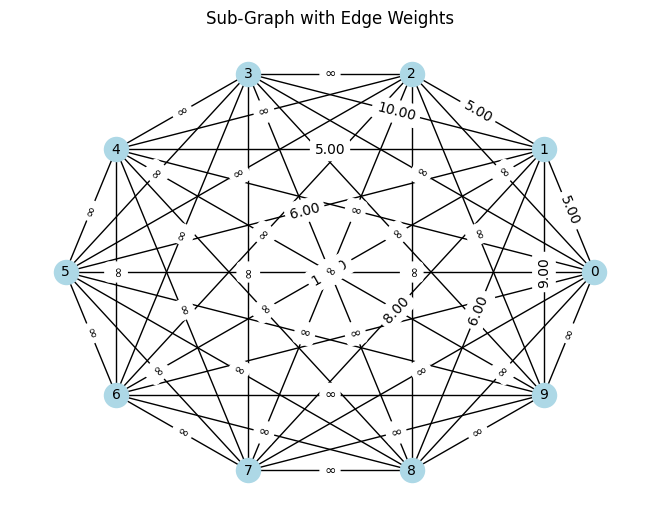

In [27]:
plot_subgrph(new_graph)

### Implementation of Ford-Fulkerson Algorithm for Maximum Flow

The Ford-Fulkerson algorithm with DFS is a method to find the maximum flow in a network:

* __Initialization:__ Start with an initial flow of zero.
* __Augmenting Paths:__ Use DFS to find augmenting paths from source to sink in the residual graph.
* __Residual Graph:__ Construct a residual graph based on current flow and capacities.
* __Flow Augmentation:__ Determine the maximum flow that can be added along the augmenting path.
* __Updating Flow:__ Update flow values and capacities accordingly.
* __Repeat:__ Repeat steps 2-5 until no more augmenting paths exist.
* __Termination:__ Terminate when no more augmenting paths are found.
* __Minimum Cut:__ The maximum flow value equals the minimum cut capacity in the network.

This algorithm can be efficient but may not always terminate in certain cases, so variants like the Edmonds-Karp algorithm are often preferred in practice.

In [28]:
def find_augmenting_path_dfs(graph, source, sink):
    def dfs(node, path, min_capacity):
        if node == sink:
            return path, min_capacity
        visited.add(node)
        for neighbor, data in graph[node].items():
            if neighbor not in visited and data['weight'] > 0 and data['weight'] != float('inf'):
                new_min_capacity = min(min_capacity, data['weight'])
                new_path = path + [(node, neighbor)]
                result = dfs(neighbor, new_path, new_min_capacity)
                if result:
                    return result
        return None
    
    visited = set()
    return dfs(source, [], float('inf'))

In [29]:
def ford_fulkerson_dfs(graph, source, sink, is_directed):
    max_flow = 0  # Initialize max flow to zero
    
    while True:
        # Find an augmenting path using DFS
        path_and_capacity = find_augmenting_path_dfs(graph, source, sink)

        # Check if an augmenting path was found
        if path_and_capacity is None:
            break

        path, capacity = path_and_capacity
        
        # Update the residual capacities along the augmenting path
        for edge in path:
            u, v = edge  # Unpack the edge (node, node)
            if is_directed == False:
                graph[u][v]['weight'] -= capacity
                graph[v][u]['weight'] -= capacity
            else:
                graph[u][v]['weight'] -= capacity

        # Handle the case of a single pair of nodes
        if len(path) == 1:
            u, v = path[0]
            if is_directed == False:
                graph[u][v]['weight'] -= capacity
                graph[v][u]['weight'] -= capacity
            else:
                graph[u][v]['weight'] -= capacity
        
        max_flow += capacity
        
        # Display the augmenting path and its bottleneck capacity
        print("Augmenting Path:", path)
        print("Bottleneck Capacity:", capacity)
        print("Current Max Flow:", max_flow)
        print()
    
    return max_flow

### Determination of Maximum-Flow for weighted sub-graph(10 nodes) using random Source & Sink

In [30]:
# Find the maximum flow for the weighted_graph using edge weights as capacities

# # Choose two random node IDs as source and target
source_node = random.choice(list(new_graph.nodes))
sink_node = random.choice(list(new_graph.nodes))
print(f"Source Node = {source_node} : Sink Node = {sink_node}\n\n")

is_directed = new_graph.is_directed()
max_flow = ford_fulkerson_dfs(new_graph, source_node, sink_node, is_directed)
print(f"Maximum Flow from Node {source_node} to Node {sink_node}: {max_flow}")

Source Node = 0 : Sink Node = 3


Augmenting Path: [(0, 1), (1, 3)]
Bottleneck Capacity: 5.0
Current Max Flow: 5.0

Maximum Flow from Node 0 to Node 3: 5.0


### Determination of Maximum-Flow for weighted sub-graph(20 nodes) using random Source & Sink

In [52]:
# Select a subset of nodes for the subgraph (e.g., first 20 nodes)
subgraph_nodes_20 = list(graph.nodes)[:20]

# Create a subgraph containing only the selected nodes and their edges
subgraph_20 = graph.subgraph(subgraph_nodes_20)

adj_matrix_20 = adjuscency_mtrx_weight(subgraph_20)

# Create a new graph from the adjacency matrix
new_graph_20 = nx.Graph(adj_matrix_20)

#Inserting weight for each edge of subgraph
for i in range(len(adj_matrix_20)):
    for j in range(len(adj_matrix_20)):
        if i != j and adj_matrix_20[i][j] != float('inf'):
            new_graph_20.add_edge(i, j, weight=adj_matrix_20[i][j])

Adjacency Matrix:
[[ 0. inf inf inf inf inf inf inf inf inf inf inf  1. inf inf inf inf inf
  inf inf]
 [inf  0. inf inf inf inf inf inf  7. inf inf inf  4. inf inf inf  1. inf
  inf inf]
 [inf inf  0. inf inf inf inf inf  6. inf inf  7. 10. inf inf inf inf inf
  inf inf]
 [inf inf inf  0. inf inf inf  5.  7. inf inf inf  3. inf inf inf inf inf
   1.  7.]
 [inf inf inf inf  0. 10. inf inf inf inf inf inf  2. inf inf inf inf inf
  inf inf]
 [inf inf inf inf 10.  0. inf inf inf inf inf inf  8. inf inf inf inf inf
  inf inf]
 [inf inf inf inf inf inf  0. inf inf inf inf inf  9. inf inf inf inf inf
  inf inf]
 [inf inf inf  5. inf inf inf  0. inf inf inf inf  2. inf inf  7.  6. inf
  inf inf]
 [inf  7.  6.  7. inf inf inf inf  0. inf inf inf  4. inf inf  4.  9. inf
  inf inf]
 [inf inf inf inf inf inf inf inf inf  0. inf inf  1. inf inf inf inf inf
  inf inf]
 [inf inf inf inf inf inf inf inf inf inf  0. inf  7. inf inf  8. inf inf
  inf inf]
 [inf inf  7. inf inf inf inf inf inf inf inf  

In [53]:
# Find the maximum flow for the weighted_graph using edge weights as capacities

# # Choose two random node IDs as source and target
source_node_20 = random.choice(list(new_graph_20.nodes))
sink_node_20 = random.choice(list(new_graph_20.nodes))
print(f"Source Node = {source_node_20} : Sink Node = {sink_node_20}\n\n")

is_directed_20 = new_graph_20.is_directed()
max_flow_20 = ford_fulkerson_dfs(new_graph_20, source_node_20, sink_node_20, is_directed_20)
print(f"Maximum Flow from Node {source_node_20} to Node {sink_node_20}: {max_flow_20}")

Source Node = 3 : Sink Node = 16


Augmenting Path: [(3, 7), (7, 12), (12, 1), (1, 8), (8, 16)]
Bottleneck Capacity: 2.0
Current Max Flow: 2.0

Augmenting Path: [(3, 7), (7, 15), (15, 8), (8, 1), (1, 16)]
Bottleneck Capacity: 1.0
Current Max Flow: 3.0

Augmenting Path: [(3, 8), (8, 2), (2, 11), (11, 12), (12, 10), (10, 15), (15, 7), (7, 16)]
Bottleneck Capacity: 4.0
Current Max Flow: 7.0

Augmenting Path: [(3, 12), (12, 8), (8, 16)]
Bottleneck Capacity: 3.0
Current Max Flow: 10.0

Augmenting Path: [(3, 18), (18, 12), (12, 16)]
Bottleneck Capacity: 1.0
Current Max Flow: 11.0

Augmenting Path: [(3, 19), (19, 12), (12, 16)]
Bottleneck Capacity: 7.0
Current Max Flow: 18.0

Maximum Flow from Node 3 to Node 16: 18.0
